# **Social Networks Code**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!pip uninstall -y python-louvain
!pip install python-louvain



Found existing installation: python-louvain 0.16
Uninstalling python-louvain-0.16:
  Successfully uninstalled python-louvain-0.16
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9388 sha256=b9ab1bb82de5ed0e37aedfa31a8882520c6b7e52f09a2983cd5aee0a63fa5874
  Stored in directory: /root/.cache/pip/wheels/d0/b0/d7/6dd26c3817810fa379088eaeb755a01d9a2a411c37632079d1
Successfully built python-louvain


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from itertools import combinations
from collections import Counter
from community import community_louvain

# Load the dataset
df = pd.read_csv('/content/gdrive/My Drive/SNA/data.csv')

# Clean the dataset by dropping rows with missing 'project_skills'
cleaned_df = df.dropna(subset=['project_skills'])

# Parse skills and count co-occurrences
skill_pairs = []
for skills in cleaned_df['project_skills']:
    # Each skill, even if compound, is considered a separate node
    skills_list = skills.split()  # This splits the string into a list of individual skills
    skill_pairs.extend(list(combinations(skills_list, 2)))  # This creates all possible pairs of skills for each project

# Count each pair's occurrences
pair_counts = Counter(skill_pairs)

# Create a network
G = nx.Graph()
for pair, weight in pair_counts.items():
    skill1, skill2 = pair
    G.add_edge(skill1, skill2, weight=weight)

# Detect communities using the Louvain method
partition = community_louvain.best_partition(G)

# Assign communities to nodes
for node, community in partition.items():
    G.nodes[node]['community'] = community


In [4]:
G_ext = nx.Graph()

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain
from itertools import combinations
from collections import Counter
import pandas as pd


cleaned_data = df.dropna(subset=['project_skills'])


skill_pairs = []
for index, row in cleaned_data.iterrows():
    skills_list = row['project_skills'].split()
    country = row['employer_country']
    for skill in skills_list:
        #each skill node has country attribute set to 'employer_country'
        if skill not in G_ext:
            G_ext.add_node(skill, country=country)
        else:

            G_ext.nodes[skill]['country'] = country
    #Creates edges with weights incremented for each co-occurrence
    for pair in combinations(skills_list, 2):
        if G_ext.has_edge(pair[0], pair[1]):
            G_ext[pair[0]][pair[1]]['weight'] += 1
        else:
            G_ext.add_edge(pair[0], pair[1], weight=1)

#Country classification
country_classification = {
    'United States': 'advanced',
    'Germany': 'advanced',
    'India': 'emerging',
    'Brazil': 'emerging',
    'Panama':'emerging',
    'Canada':'advanced',
    'France':'advanced',
    'Spain':'advanced',
    'New Zealand':'advanced',
    'Puerto Rico':'advanced',
    'Netherlands Antilles':'emerging',
    'United Arab Emirates':'emerging',
    'Belgium':'advanced',
    'Israel':'advanced',
    'Indonesia':'emerging',
    'United Kingdom':'advanced',
    'Finland':'advanced',
    'Australia':'advanced',
    'Switzerland':'advanced',
    'Trinidad and Tobago':'emerging',
    'Kenya':'emerging',
    'Singapore':'advanced',
    'Portugal':'advanced',
    'Italy':'advanced',
    'Malaysia':'emerging',
    'Denmark':'advanced',
    'Iceland':'advanced',
    'Pakistan':'emerging',
    'Slovenia':'advanced',
    'Malawi':'emerging',
    'Thailand':'emerging',
    'South Africa':'emerging',
    'Poland':'emerging',
    'Latvia':'advanced',
    'Greece':'advanced',
    'Hong Kong':'advanced',
    'Turkey':'emerging',
    'Estonia':'advanced',
    'Norway':'advanced',
    'Hungary':'emerging',
    'Bosnia and Herzegovina':'emerging',
    'Mexico':'emerging',
    'Czech Repulic':'advanced',
    'Jordan':'emerging',
    'Uruguay':'emerging',
    'Russia':'emerging',
    'Egypt':'emerging',
    'Vietnam':'emerging',
    'Cyprus':'advanced',
    'Lebanon':'emerging',
    'Sweden':'advanced',
    'Jersey':'advanced',
    'Lithuania':'advanced',
    'Ireland':'advanced',
    'Cambodia':'emerging',
    'Tanzania':'emerging',
    'Philippines':'emerging',
    'Malta':'advanced',
    'Japan':'advanced',
    'Saudi Arabia':'emerging',
    'South Korea':'advanced',
    'Luxembourg':'advanced',
    'Costa Rica':'emerging',
    'Botswana':'emerging',
    'Sri Lanka':'emerging',
    'Slovakia':'advanced',
    'Macaco':'advanced',
    'China':'emerging',
    'United States and Minor outlying islands':'emerging',
    'Romania':'emerging',
    'Venezuela':'emerging',
    'Morocco':'emerging',
    'Jamacia':'emerging',
    'Austria':'advanced'














}

#Assign 'economy_type' based on 'country'
for node in G_ext.nodes():
    country = G_ext.nodes[node]['country']
    G_ext.nodes[node]['economy_type'] = country_classification.get(country, 'unknown')


In [6]:
partition = community_louvain.best_partition(G_ext)

# Set node colors by their economy type for visualization
economy_colors = {'advanced': 'blue', 'emerging': 'green', 'unknown': 'gray'}
node_colors = [economy_colors.get(G_ext.nodes[node]['economy_type'], 'gray') for node in G_ext.nodes()]


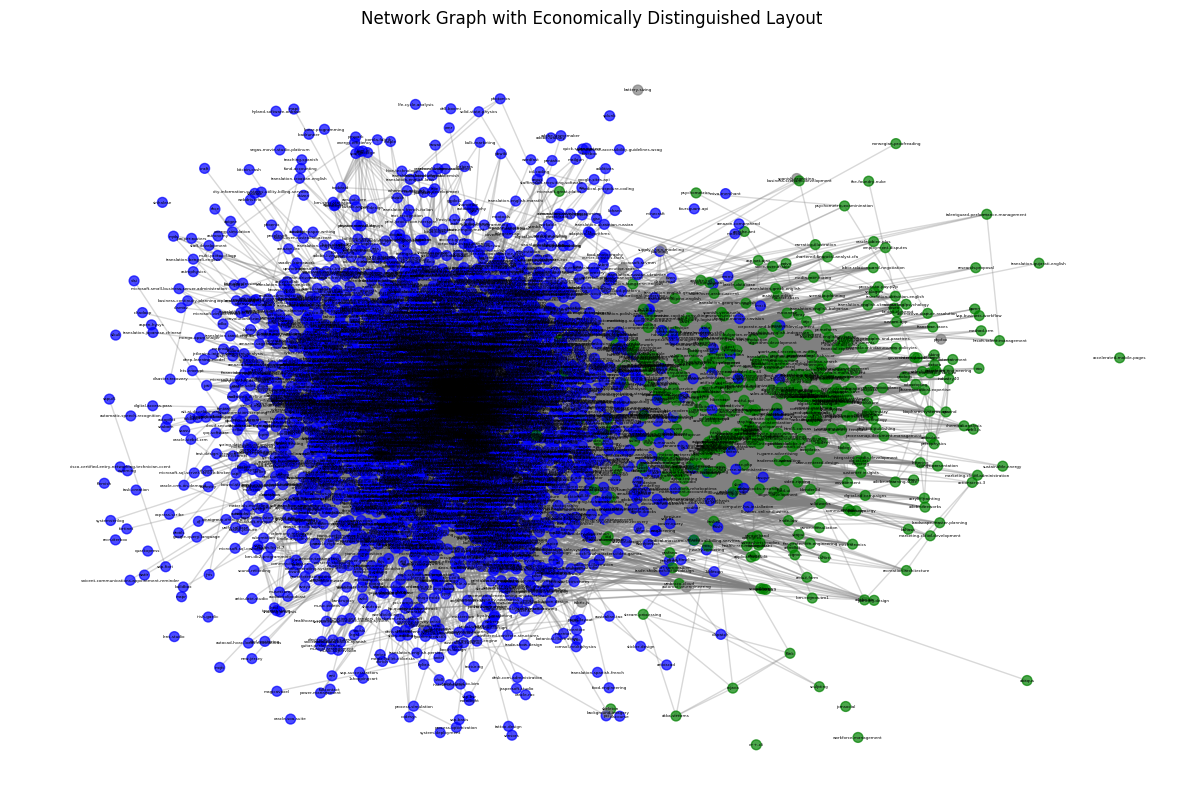

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain
import numpy as np

#G_ext and node_colors are already defined

#Applying a force-directed layout
pos = nx.spring_layout(G_ext, k=0.15, iterations=50)

#Adjust positions slightly based on economy type to enhance look
x_offset = 0.5  # Horizontal offset
for node in G_ext.nodes():
    if G_ext.nodes[node]['economy_type'] == 'advanced':
        #
        pos[node] = (pos[node][0] - x_offset, pos[node][1])  #moves
    elif G_ext.nodes[node]['economy_type'] == 'emerging':
        #Corrected to adjust the x-coordinate
        pos[node] = (pos[node][0] + x_offset, pos[node][1])  # Move slightly to the right

##network with adjusted positions
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G_ext, pos, node_color=node_colors, alpha=0.7, node_size=50)
nx.draw_networkx_edges(G_ext, pos, alpha=0.3, edge_color='gray')
#Smaller font size for labels
nx.draw_networkx_labels(G_ext, pos, font_size=3, font_color='black')

plt.title('Network Graph with Economically Distinguished Layout')
plt.axis('off')
plt.show()
